- [View data](https://www.kaggle.com/sulianova/feature-explanation-and-eda)
- [View code](https://www.kaggle.com/sulianova/normalization-logistic-regression-random-forest)

# Data Introduction


    The "Diagnostic Wisconsin Breast Cancer Database" is a publicly available data set from the UCI machine learning repository. The dataset gives information about tumor features, that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. For each observation there are 10 features, which describe tumor size, density, texture, symmetry, and other characteristics of the cell nuclei present in the image. The mean, standard error and "worst" mean (mean of the three largest values) of these features were computed for each image, resulting in 30 features. The categorical target feature indicates the type of the tumor.
# <center>
<img align="center" src="http://www.jcytol.org/articles/2016/33/4/images/JCytol_2016_33_4_182_190449_f1.jpg">
<br>

In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import decomposition
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("Breast_cancer_data_for_ML.csv", index_col = 'id')

In [6]:
df.head(4)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN


In [7]:
df.drop('Unnamed: 32',axis = 1 ,inplace = True)#axis : {0 or 'index', 1 or 'columns'}；inplace : bool, default False，If True, do operation inplace and return None.

In [8]:
df.head(4)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [9]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B':0})

In [10]:
df.head(4)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [11]:
X=df.drop('diagnosis',axis = 1)

In [12]:
type(X)

pandas.core.frame.DataFrame

In [13]:
X.head(4)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


## Content:

1、PCA  
2、Normalization  

## Principal Component Analysis
The data has 30 dimensions, but we are going to reduce it to 2 and to see whether variables are separated into clusters. It is better to scale data to avoid differencing in values and normalize ranges.

In [15]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

pca = decomposition.PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)

print('Projecting %d-dimensional data to 2D' % X_scaled.shape[1])

Projecting 30-dimensional data to 2D


In [16]:
X_pca_scaled.shape

(569, 2)

Text(0.5, 1.0, 'Data. PCA projection')

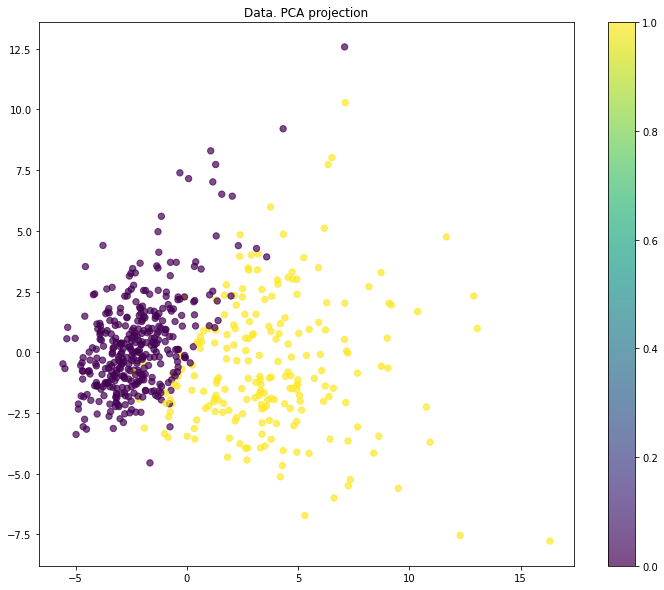

In [17]:
plt.figure(figsize=(12,10))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=df['diagnosis'], alpha=0.7, s=40);
plt.colorbar()
plt.title('Data. PCA projection')

In practice, we would choose the number of principal components such that we can explain 90% of the initial data dispersion (via the explained_variance_ratio). Here, that means retaining 6 principal components; therefore, we reduce the dimensionality from 30 features to 6.

In [18]:
pca = decomposition.PCA().fit(X_scaled)

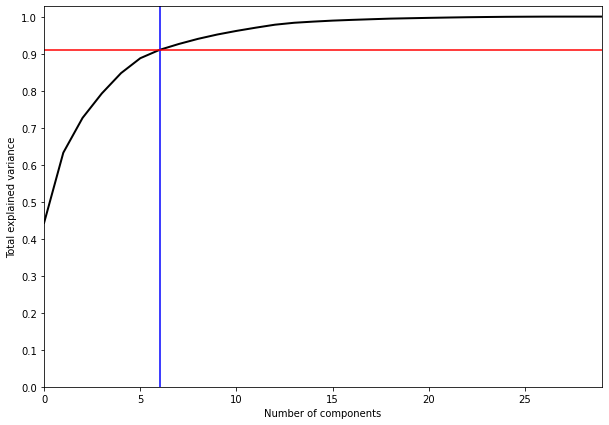

In [19]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 29)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(6, c='b')
plt.axhline(0.91, c='r')
plt.show()

## **Without PCA**

In [30]:
data = pd.read_csv("Breast_cancer_data_for_ML.csv", index_col = 'id')
data.drop('Unnamed: 32',axis = 1 ,inplace = True)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B':0})
X = data.drop('diagnosis',axis = 1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier()

knn.fit(X_train, y_train)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)

accuracy_knn = knn.score(X_test, y_test)
accuracy_tree = metrics.accuracy_score(y_test,pred_tree)

print('Accuracy using KNN = '+ str(accuracy_knn))
print('Accuracy using Decission Tree = '+ str(accuracy_tree))

Accuracy using KNN= 0.9230769230769231
Accuracy using Decission Tree= 0.916083916083916


## **With PCA (componenets = 6)**

In [49]:
data = pd.read_csv("Breast_cancer_data_for_ML.csv", index_col = 'id')
data.drop('Unnamed: 32',axis = 1 ,inplace = True)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B':0})
X = data.drop('diagnosis',axis = 1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

pca = decomposition.PCA(n_components=6)

X_train_pca_scaled = pca.fit_transform(X_train_scaled)
X_test_pca_scaled = pca.fit_transform(X_test_scaled)


knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier()

knn.fit(X_train_pca_scaled, y_train)
tree.fit(X_train_pca_scaled, y_train)
pred_tree = tree.predict(X_test_pca_scaled)

accuracy_knn = knn.score(X_test_pca_scaled, y_test)
accuracy_tree = metrics.accuracy_score(y_test,pred_tree)

print('Accuracy using KNN = '+ str(accuracy_knn))
print('Accuracy using Decission Tree = '+ str(accuracy_tree))

Accuracy using KNN = 0.9300699300699301
Accuracy using Decission Tree = 0.9090909090909091


As it can be seen, that the first 6 components correspond to approximately 91% of the cumulative sum over all the variance. 

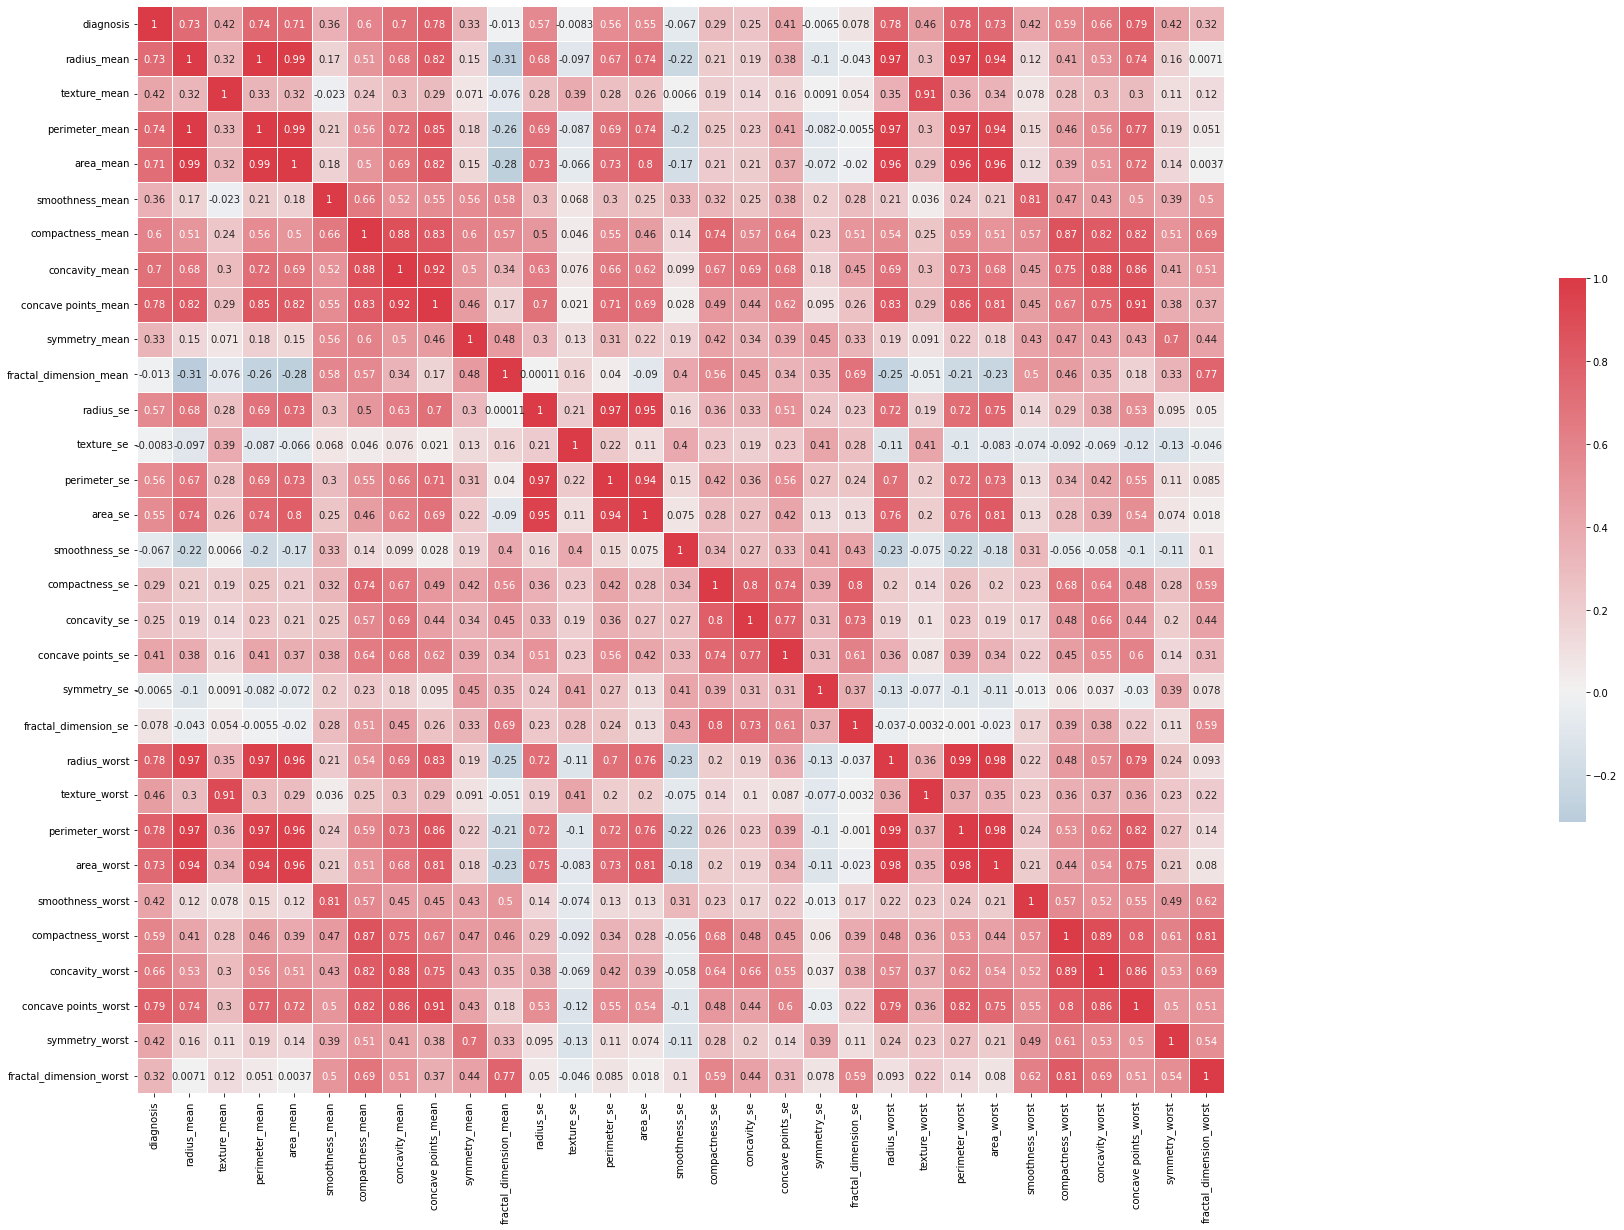

In [20]:
corr = df.corr()
cmap = sns.diverging_palette(240,10, as_cmap=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(120, 20))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0,annot = True,
            square=True, linewidths=1, cbar_kws={"shrink": .5});

## Normalization
The Standard Scaler is one of the most widely used scaling algorithms. It assumes that the data follows a Gaussian distribution. Before scaling numerical features, we have to check whether they follow normal distribution:

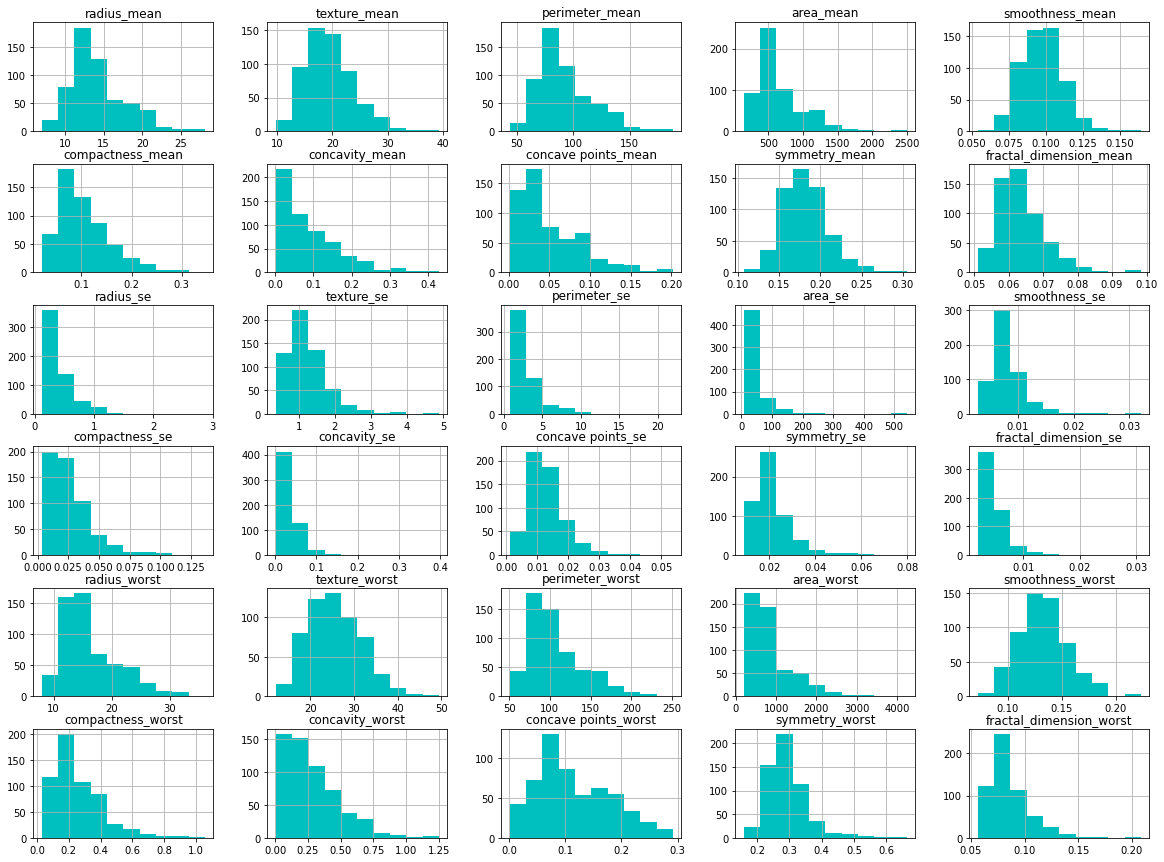

In [23]:
X = df.drop(['diagnosis'], axis=1)
(X+0.001).hist(figsize=(20, 15), color = 'c');

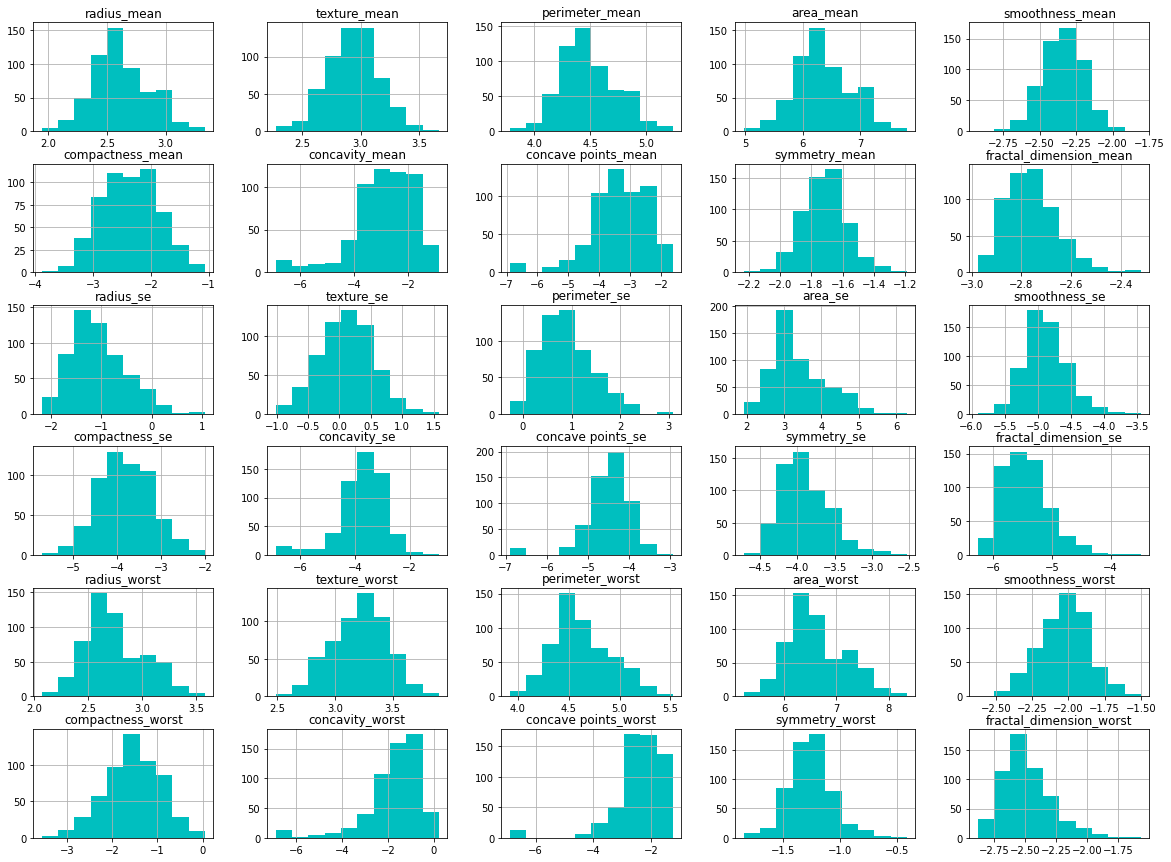

In [24]:
#Log transformation
X = df.drop(['diagnosis'], axis=1)
X_log = np.log(X+0.001)
X_log.hist(figsize=(20, 15), color = 'c');

## Decision tree
Let's find out what are the best parameters for the Decision tree with GridSearch:

In [26]:
from sklearn.model_selection import GridSearchCV

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

tree = DecisionTreeClassifier(random_state=17)

tree_params = {'max_depth': range(1,5), 'max_features': range(3,6), 'criterion': ['gini','entropy']}

tree_grid = GridSearchCV(tree, tree_params, cv=10, scoring='recall')
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 5),
                         'max_features': range(3, 6)},
             scoring='recall')

In [27]:
tree_grid.best_params_, tree_grid.best_score_

({'criterion': 'gini', 'max_depth': 4, 'max_features': 4}, 0.9204166666666665)

In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
tree_pred = tree_grid.predict(X_holdout)
print ("Accuracy Score : ",accuracy_score(y_holdout, tree_pred) )
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, tree_pred))
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, tree_pred))

Accuracy Score :  0.9532163742690059
Recall Score (how much of malignant tumours were predicted correctly) :  0.9508196721311475
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.9206349206349206


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_holdout, tree_pred)

array([[105,   5],
       [  3,  58]], dtype=int64)

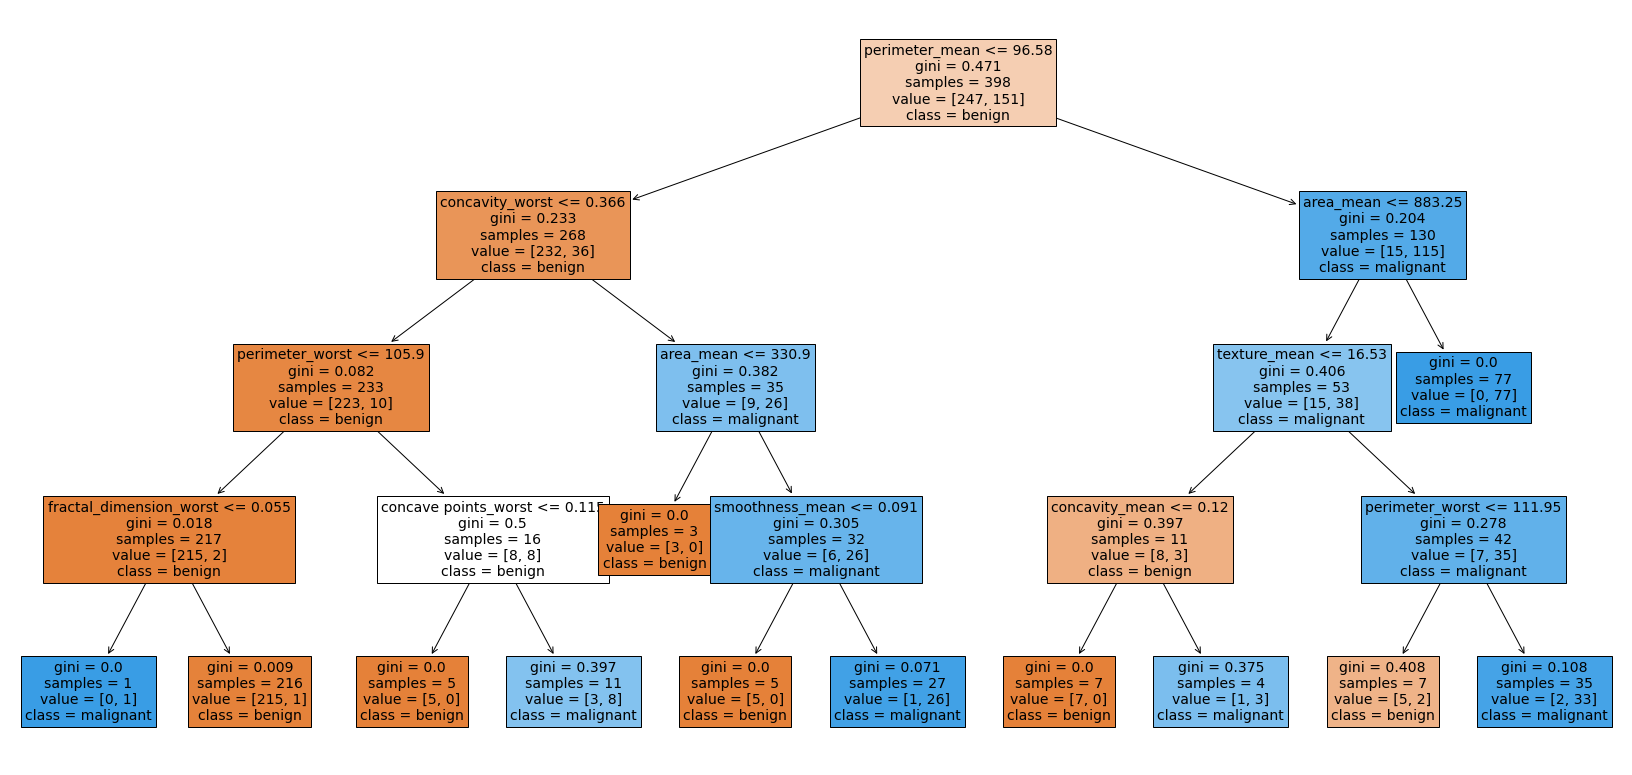

In [30]:
from sklearn import tree    
from sklearn.tree import plot_tree    
plt.figure(figsize=(29,14))     
plot_tree(tree_grid.best_estimator_, class_names = ['benign', 'malignant'], feature_names = df.drop(['diagnosis'], axis=1).columns,filled=True,fontsize=14)   
plt.show()    